# Introduction

This notebook is the final notebook which shows the baseline model and the final model. It does not contain iterations and other models that were tested; those are included in model_testing_obesity_classification, which is a copy of this document but includes my tests. 

## Business Objective: 
To improve marketing efforts for obese and overweight customers based on lifestyle metrics, age, and gender for Accenture Marketing.

### Questions we are hoping to answer:
#### How can we identify if someone is Obese without asking for their height and weight?

#### What lifestyle characteristics are the most important in predicting obesity?

#### Can we predict if someone may be obese based on their search history profile?

We want to answer these questions because marketing is difficult with irrelevant data. We want to transform irrelevant data we have about someone's lifestyle, derived from search history or a survey, to useful data we can leverage in a predictive model for classifying obesity. If we are able to classify obesity without asking for the height or weight of an individual, we can use previously useless data we have stored about that individual to more effectively market to them. For example, knowing someone's propensity to snack turns out to be one of the strongest predictors of obesity. 

Accenture marketing can use this machine learning algorithm to improve marketing segmentation for Obese, Overweight, Normal, and Underweight individuals either by using the most important predictive features output by this algorithm or by using the algorithm to predict obesity based on lifestyle characteristics of a person derived from their search history profile. We will use machine learning to create a predictive model to classify for obesity based on these metrics:

### Legend:
Frequent consumption of high caloric food (FAVC)

Frequency of consumption of vegetables (FCVC)

Number of main meals (NCP)

Consumption of food between meals (CAEC)

Consumption of water daily (CH20)

Consumption of alcohol (CALC)

Calories consumption monitoring (SCC)

Physical activity frequency (FAF)

Time using technology devices (TUE)

Transportation used (MTRANS)

Gender

Age

The target variable NObeyesdad is a multi-class variable with 7 classes binned according to the following parameters:

#### BMI = weight (kg) / [height (m)]2

0: Underweight less than 18.5

1: Normal 18.5 to 24.9

2: Overweight I: 25.0 to ~27.5

3: Overweight II: ~27.5 to 29.9

4: Obesity I 30.0 to 34.9

5: Obesity II 35.0 to 39.9

6: Obesity III Higher than 40


## Approach:
The goal is to produce an accurate machine learning model which can classify for obesity based on lifestyle metrics, Age, and Gender. I have not used any data about BMI which was included in the original data, as it would result in data leakage. I investigated if there are any signals which could best predict for obesity, and found three. These signals can be used in marketing segmentation algorithms as weights, giving more weight to predictive features and less weight to less predictive features in a marketing segmentation algorithm. 

I leveraged machine learning techniques such as Decision Trees and Random Forests which produced favorable results. Other algorithms such as Gaussian Bayes, K Nearest Neighbor, Logistic Regression, and stacking did not produce favorable results when compared to the alternatives. In the end, the best model was a XGBoosted Decision Tree. 

Please note this data was in large part synthetically generated, so it is uncertain how well the model may perform in real life applications. The model is further limited because of the exclusion of Height and Weight, which are used in the original research paper to produce more favorable results than this model, but are a form of data leakage to be in a final model. Since weight classes are calculated using BMI, including metrics related to BMI in this model would not showcase the model's true predictive potential on lifestyle characteristics. 

The objective of the final model is to have the highest test accuracy compared to other models, and an overall very decent cross-validation accuracy. When comparing relative models in initial iterations, I compared cross-validated accuracy to determine which models were typically more performative. I iterated using the following approach:

1. Test no hyperparameters for each valid model: KNN, LogReg, RandomForest, DecisionTree, XGBoost, GaussianBayes
2. Compare results
3. Dismiss worst models - LogReg, KNN, GaussianBayes and set baseline as RandomForest
4. Look back at data and see if the data can be further cleaned or if values could be preprocessed differently with different transformers
5. Search with GridSearchCV to find the best ranges for hyperparameters for RandomForest, DecisionTree, XGBoost
6. Refine and tune the hyperparameters for the best models (dismissed DecisionTree in favor of RandomForest)
7. Compare RandomForest vs XGBoost tuned
8. Determine XGBoost tuned with StandardScaling produced the best results

The various iterations are stored in the model_testing_obesity_classification file if you want to look. Please be mindful it may take a long time to run if you choose to uncomment the code blocks in the grid search parameters. 

## Data Sources
Download: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

Data Description: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

Research Paper highlighting the applications of this data set for a decision tree model:
https://thescipub.com/pdf/jcssp.2019.67.77.pdf

### Data Description

This data is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).

Fabio Mendoza Palechor, Alexis de la Hoz Manotas,
Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico,
Data in Brief,
Volume 25,
2019,
104344,
ISSN 2352-3409,
https://doi.org/10.1016/j.dib.2019.104344.
(https://www.sciencedirect.com/science/article/pii/S2352340919306985)
Abstract: This paper presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).
Keywords: Obesity; Data mining; Weka; SMOTE


# Imports

In [1]:
import itertools
import os
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN, KMeansSMOTE, RandomOverSampler, SMOTE, SMOTENC
from imblearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, StackingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, recall_score, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import set_config

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
warnings.filterwarnings("ignore")

# Set global config for scikit-learn
set_config(display='diagram')

# EDA

Import csv and read into Pandas Dataframe

In [2]:
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
display(df.head())
display(df.info())
display(df.describe())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

None

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Check for NAN values

In [3]:
df.isna().sum().sum()

0

Check correlation

In [4]:
df.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


Check value counts per column

In [5]:
[display(df[i].value_counts()) for i in df.columns]

Male      1068
Female    1043
Name: Gender, dtype: int64

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
19.314964      1
21.900120      1
23.421726      1
18.312665      1
61.000000      1
Name: Age, Length: 1402, dtype: int64

1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.680762     1
1.819875     1
1.530248     1
1.654067     1
1.885543     1
Name: Height, Length: 1574, dtype: int64

80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
90.138680      1
89.738596      1
115.828167     1
108.721893     1
122.119682     1
Name: Weight, Length: 1525, dtype: int64

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

yes    1866
no      245
Name: FAVC, dtype: int64

3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.816460      2
           ... 
1.943130      1
2.530233      1
1.443674      1
2.076689      1
2.562100      1
Name: FCVC, Length: 810, dtype: int64

3.000000    1203
1.000000     199
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

no     2067
yes      44
Name: SMOKE, dtype: int64

2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.931438      1
2.224914      1
2.724099      1
2.714091      1
2.318736      1
Name: CH2O, Length: 1268, dtype: int64

no     2015
yes      96
Name: SCC, dtype: int64

0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.067817      2
           ... 
0.979306      1
0.246290      1
1.217180      1
1.684582      1
1.170537      1
Name: FAF, Length: 1190, dtype: int64

0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.220029      1
0.052942      1
0.957463      1
1.425852      1
0.857438      1
Name: TUE, Length: 1129, dtype: int64

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Data Preparation

Round synthetic data to corrrespond to questionaire

In [6]:
# data came with floats where there should be int responses
cols_to_round= ["FCVC", "NCP", "CH2O", "FAF", "TUE", "Age"]

# quick function to correct this
def column_rounder(df, cols):
    for col in cols:
        df[col] = df[col].round(0)
    return df

df[cols_to_round] = column_rounder(df[cols_to_round], cols_to_round)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Manually encode that None response would be a 0

In [7]:
# encoding FCVC to better understand the value
df.FCVC = [x-1 for x in df.FCVC]
df.FCVC.value_counts()

1.0    1013
2.0     996
0.0     102
Name: FCVC, dtype: int64

Manual encode weight classes in order of severity

In [8]:
target_categories = {
'Insufficient_Weight':0,
 'Normal_Weight':1,
 'Overweight_Level_I':2,
 'Overweight_Level_II':3,
 'Obesity_Type_I':4,
 'Obesity_Type_II':5,
 'Obesity_Type_III':6
 }

df.NObeyesdad = [target_categories[key] for key in df.NObeyesdad]
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,1.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,2.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,1.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,2.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,no,no,1.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3


Label encode relevant columns

In [9]:
cols_to_le = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]
for i in cols_to_le:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,1.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,3,1
1,0,21.0,1.52,56.0,1,0,2.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,3,1
2,1,23.0,1.80,77.0,1,0,1.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,3,1
3,1,27.0,1.80,87.0,0,0,2.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,4,2
4,1,22.0,1.78,89.8,0,0,1.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,3,3


Encoding into a seperate df to show a heatmap

In [10]:
demo_df = df
cols_to_ord = ["CAEC", "CALC"]
demo_df = demo_df.drop(columns=["Height", "Weight"])

ord_enc = OrdinalEncoder(categories=[["no", "Sometimes", "Frequently", "Always"],
                                         ["no", "Sometimes", "Frequently", "Always"]])

demo_df[cols_to_ord] = ord_enc.fit_transform(demo_df[cols_to_ord])

demo_df["Age"] = [np.log(x) for x in demo_df["Age"]]
demo_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,3.044522,1,0,1.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,3,1
1,0,3.044522,1,0,2.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,3,1
2,1,3.135494,1,0,1.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,3,1
3,1,3.295837,0,0,2.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,4,2
4,1,3.091042,0,0,1.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,3.044522,1,1,2.0,3.0,1.0,0,2.0,0,2.0,1.0,1.0,3,6
2107,0,3.091042,1,1,2.0,3.0,1.0,0,2.0,0,1.0,1.0,1.0,3,6
2108,0,3.135494,1,1,2.0,3.0,1.0,0,2.0,0,1.0,1.0,1.0,3,6
2109,0,3.178054,1,1,2.0,3.0,1.0,0,3.0,0,1.0,1.0,1.0,3,6


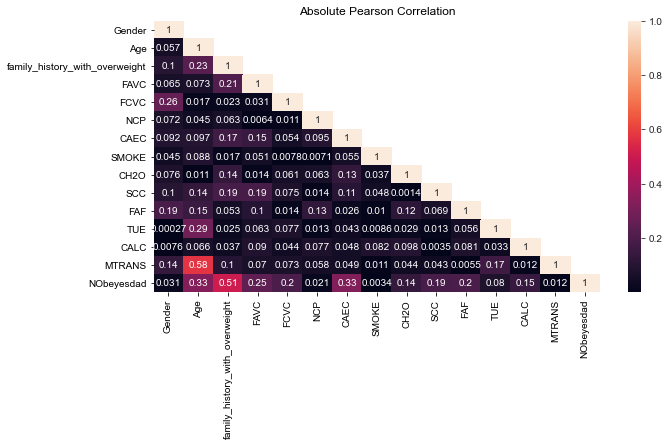

numeric abs(correlation) order: 
family_history_with_overweight    0.505148
Age                               0.332940
CAEC                              0.329350
FAVC                              0.247793
FAF                               0.197186
FCVC                              0.195705
SCC                               0.194508
CALC                              0.151752
CH2O                              0.138171
TUE                               0.079528
Gender                            0.031464
NCP                               0.020931
MTRANS                            0.011818
SMOKE                             0.003442
Name: NObeyesdad, dtype: float64


In [11]:
# correlation heatmap
corr_df = demo_df.corr().abs()

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
mask = np.triu(np.ones_like(corr_df), k=1)
sns.heatmap(corr_df, annot=True, mask=mask, ax=ax).set(title='Absolute Pearson Correlation')

plt.savefig('charts/Absolute_Pearson_Correlation.png')
plt.show()
print("numeric abs(correlation) order: \n{}".format(corr_df['NObeyesdad'].sort_values(ascending=False)[1:]))

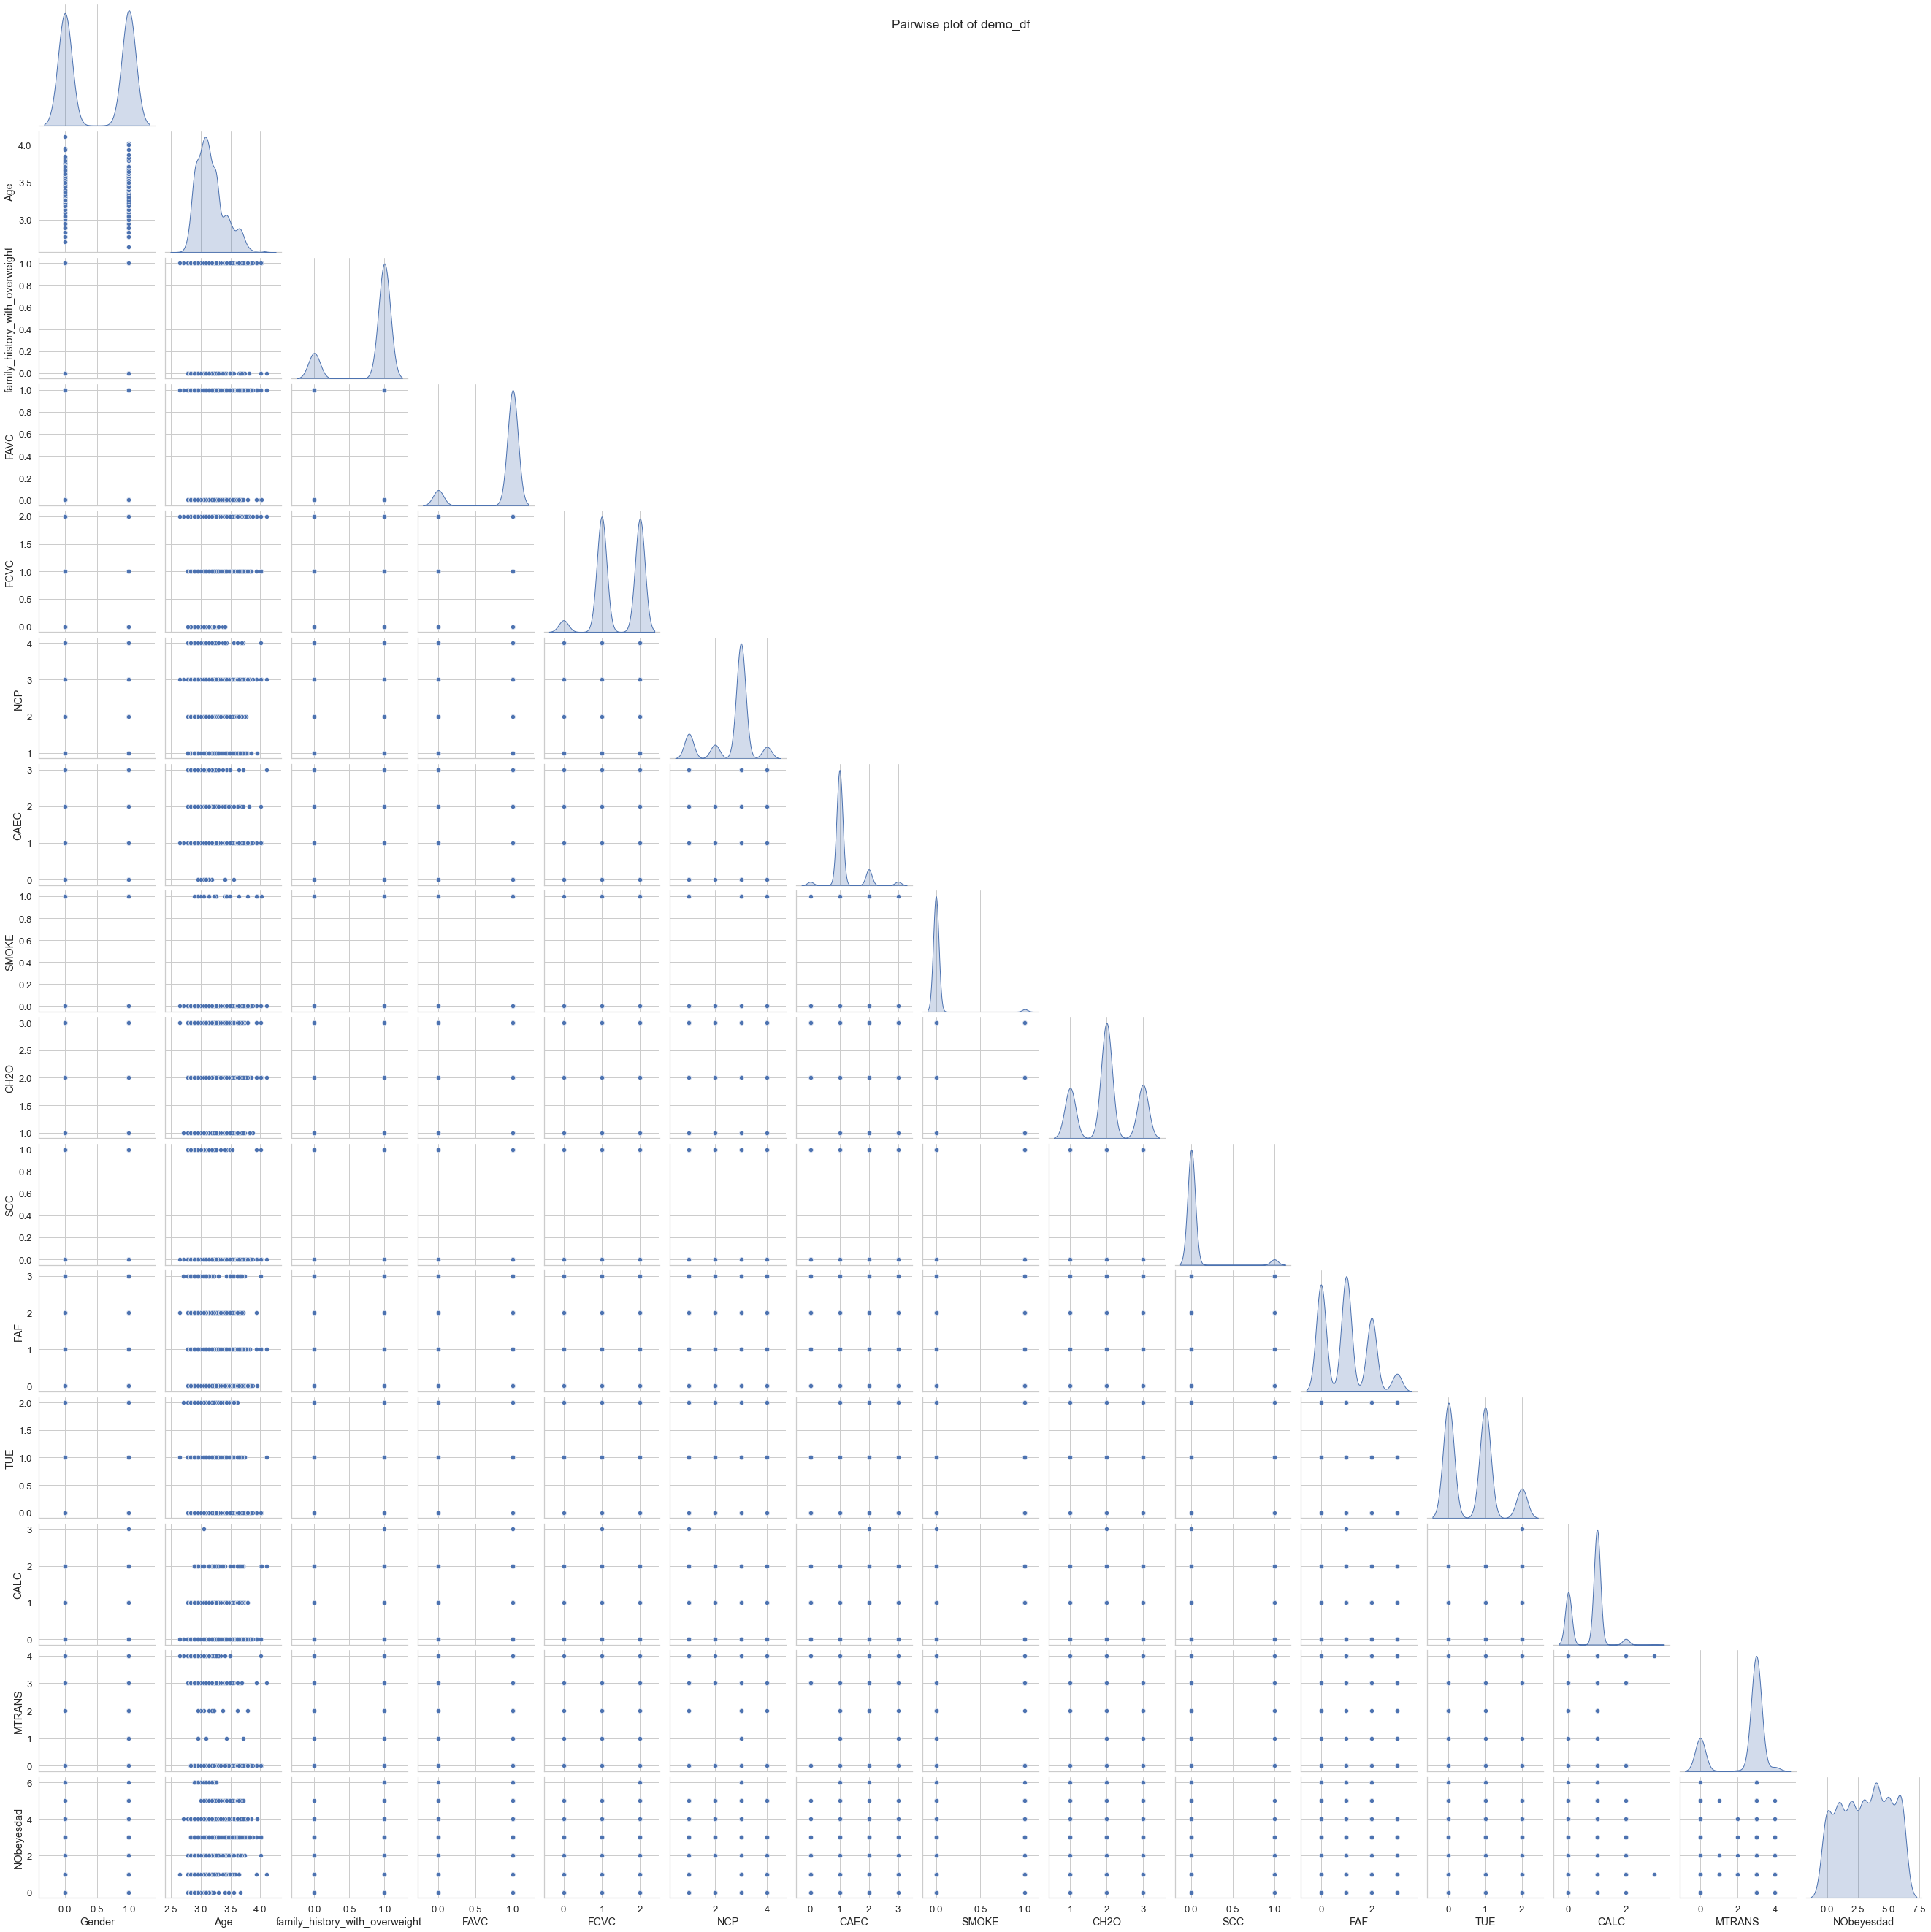

In [12]:
# plot only lower triangle due to symmetry
# shows mostly categorical distributions
sns.set(style='whitegrid', font_scale=1.2)
ax = sns.pairplot(demo_df, 
                 corner=True, 
                 diag_kind='kde')
ax.fig.suptitle('Pairwise plot of demo_df')
plt.savefig('charts/Pairwise_plot_of_demo_df.png')
plt.show()

# Train test split

In [13]:
# dropping target, Height, and Weight
col_to_drop = ["NObeyesdad", "Height", "Weight"] 
X = df.drop(columns=col_to_drop)
y = df["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

## Inspect X train

In [14]:
X_train

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
442,1,26.0,1,1,1.0,3.0,Sometimes,0,2.0,0,0.0,1.0,Sometimes,4
253,0,26.0,1,1,1.0,1.0,Sometimes,0,2.0,0,0.0,2.0,Sometimes,3
554,1,16.0,0,1,1.0,2.0,Sometimes,0,3.0,0,1.0,0.0,Sometimes,3
1500,1,24.0,1,1,1.0,3.0,Sometimes,0,1.0,0,0.0,1.0,no,0
359,0,33.0,1,0,1.0,3.0,Sometimes,0,2.0,0,1.0,0.0,Sometimes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1,19.0,0,1,1.0,4.0,Frequently,0,2.0,0,3.0,1.0,Frequently,0
840,1,20.0,1,1,2.0,3.0,Sometimes,0,3.0,0,2.0,0.0,Sometimes,3
1794,1,31.0,1,1,2.0,2.0,Sometimes,0,1.0,0,1.0,1.0,no,3
155,0,31.0,1,1,2.0,1.0,Frequently,0,2.0,0,1.0,1.0,Sometimes,0


## Data preparation for X_train

### Ordinal Encode

In [15]:
cols_to_ord = ["CAEC", "CALC"]

ord_enc = OrdinalEncoder(categories=[["no", "Sometimes", "Frequently", "Always"],
                                    ["no", "Sometimes", "Frequently", "Always"]])

X_train[cols_to_ord] = ord_enc.fit_transform(X_train[cols_to_ord])
X_test[cols_to_ord] = ord_enc.transform(X_test[cols_to_ord])
X_train.head()


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
442,1,26.0,1,1,1.0,3.0,1.0,0,2.0,0,0.0,1.0,1.0,4
253,0,26.0,1,1,1.0,1.0,1.0,0,2.0,0,0.0,2.0,1.0,3
554,1,16.0,0,1,1.0,2.0,1.0,0,3.0,0,1.0,0.0,1.0,3
1500,1,24.0,1,1,1.0,3.0,1.0,0,1.0,0,0.0,1.0,0.0,0
359,0,33.0,1,0,1.0,3.0,1.0,0,2.0,0,1.0,0.0,1.0,3


See correlations of X_train

In [16]:
X_train.corr()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
Gender,1.000000,0.045974,0.095035,0.078526,-0.272743,0.081745,-0.092890,0.045388,0.056896,-0.098695,0.202470,0.015315,0.006922,-0.143400
Age,0.045974,1.000000,0.218257,0.083431,0.000779,-0.053270,-0.082336,0.094705,-0.034033,-0.121402,-0.127657,-0.283199,0.036785,-0.606381
family_history_with_overweight,0.095035,0.218257,1.000000,0.204672,0.009883,0.046047,-0.158420,0.003502,0.128790,-0.180247,-0.058395,0.024205,-0.029362,-0.106733
FAVC,0.078526,0.083431,0.204672,1.000000,-0.059913,-0.011639,-0.166281,-0.064057,0.012077,-0.199856,-0.118977,0.068491,0.119627,-0.079010
FCVC,-0.272743,0.000779,0.009883,-0.059913,1.000000,0.041271,0.069792,0.002427,0.052400,0.076476,0.021490,-0.087493,0.035553,0.083170
NCP,0.081745,-0.053270,0.046047,-0.011639,0.041271,1.000000,0.101231,0.005585,0.052512,0.000133,0.130696,0.004125,0.074801,-0.065573
CAEC,-0.092890,-0.082336,-0.158420,-0.166281,0.069792,0.101231,1.000000,0.055045,-0.121622,0.102785,0.034518,0.043418,-0.058633,0.043745
SMOKE,0.045388,0.094705,0.003502,-0.064057,0.002427,0.005585,0.055045,1.000000,-0.027992,0.066177,0.019631,0.018467,0.091905,-0.033637
CH2O,0.056896,-0.034033,0.128790,0.012077,0.052400,0.052512,-0.121622,-0.027992,1.000000,-0.005737,0.099436,-0.036897,0.096333,0.058086
SCC,-0.098695,-0.121402,-0.180247,-0.199856,0.076476,0.000133,0.102785,0.066177,-0.005737,1.000000,0.070929,-0.016485,-0.008174,0.044821


In [17]:
# Make sure values are encoded properly
X_train.FCVC.value_counts()

1.0    817
2.0    789
0.0     82
Name: FCVC, dtype: int64

### Normalize Age

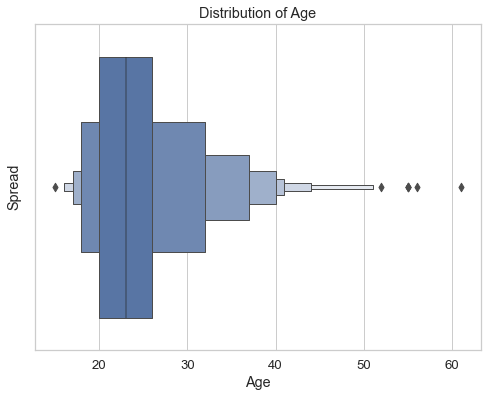

<Figure size 576x432 with 0 Axes>

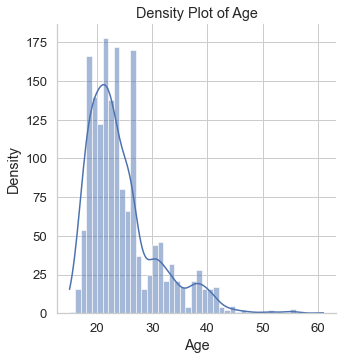

In [18]:
# Distribution is Laplace
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.boxenplot(X_train.Age)
plt.ylabel('Spread')
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.displot(X_train.Age, kde=True)
plt.ylabel('Density')
plt.title('Density Plot of Age')
plt.savefig('charts/Density_Plot_of_Age.png')

plt.show()


Log Transform Age

In [19]:
# Log transform for a more normal distribution
X_train["Age"] = [np.log(x) for x in X_train["Age"]]
X_test["Age"] = [np.log(x) for x in X_test["Age"]]


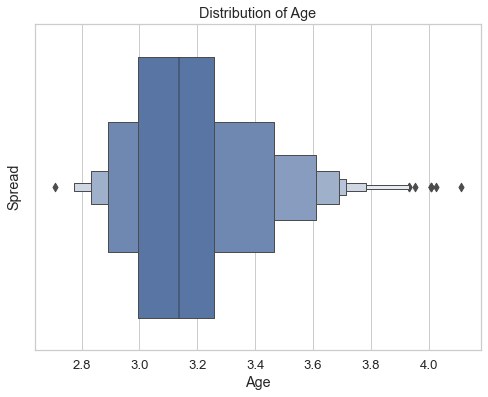

<Figure size 576x432 with 0 Axes>

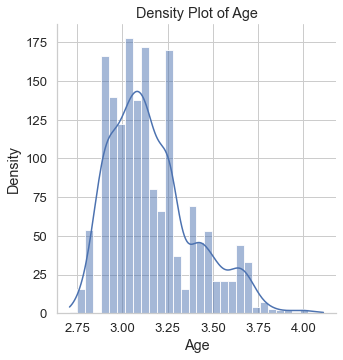

In [20]:
# show Age after transform
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.boxenplot(X_train.Age)
plt.ylabel('Spread')
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.displot(X_train.Age, kde=True)
plt.ylabel('Density')
plt.title('Density Plot of Age')
plt.savefig('charts/Density_Plot_of_Age_log.png')
plt.show()

## Visualize columns in X_train

1    846
0    842
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

3.044522    178
3.135494    172
3.258097    170
2.890372    166
2.944439    140
3.091042    138
2.995732    122
3.178054     80
3.218876     66
2.833213     54
3.433987     46
3.401197     44
3.295837     37
3.496508     32
3.637586     28
3.367296     25
3.526361     21
3.465736     21
3.610918     21
3.713572     17
3.555348     17
3.663562     16
2.772589     16
3.332205     16
3.688879     16
3.784190      5
3.737670      4
3.583519      4
4.007333      3
3.761200      2
3.931826      2
3.828641      2
3.850148      1
3.806662      1
3.951244      1
4.110874      1
2.708050      1
4.025352      1
3.871201      1
Name: Age, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

1    1383
0     305
Name: family_history_with_overweight, dtype: int64

Text(0.5, 1.0, 'Distribution of family_history_with_overweight')

1    1492
0     196
Name: FAVC, dtype: int64

Text(0.5, 1.0, 'Distribution of FAVC')

1.0    817
2.0    789
0.0     82
Name: FCVC, dtype: int64

Text(0.5, 1.0, 'Distribution of FCVC')

3.0    1166
1.0     255
2.0     146
4.0     121
Name: NCP, dtype: int64

Text(0.5, 1.0, 'Distribution of NCP')

1.0    1414
2.0     188
3.0      43
0.0      43
Name: CAEC, dtype: int64

Text(0.5, 1.0, 'Distribution of CAEC')

0    1653
1      35
Name: SMOKE, dtype: int64

Text(0.5, 1.0, 'Distribution of SMOKE')

2.0    892
3.0    413
1.0    383
Name: CH2O, dtype: int64

Text(0.5, 1.0, 'Distribution of CH2O')

0    1609
1      79
Name: SCC, dtype: int64

Text(0.5, 1.0, 'Distribution of SCC')

1.0    619
0.0    582
2.0    401
3.0     86
Name: FAF, dtype: int64

Text(0.5, 1.0, 'Distribution of FAF')

0.0    769
1.0    728
2.0    191
Name: TUE, dtype: int64

Text(0.5, 1.0, 'Distribution of TUE')

1.0    1108
0.0     520
2.0      59
3.0       1
Name: CALC, dtype: int64

Text(0.5, 1.0, 'Distribution of CALC')

3    1256
0     373
4      44
2       9
1       6
Name: MTRANS, dtype: int64

Text(0.5, 1.0, 'Distribution of MTRANS')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

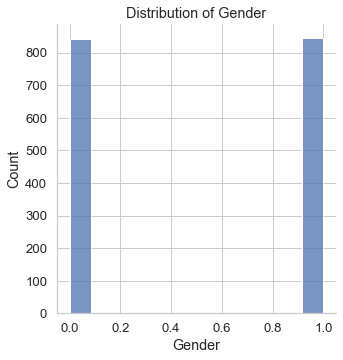

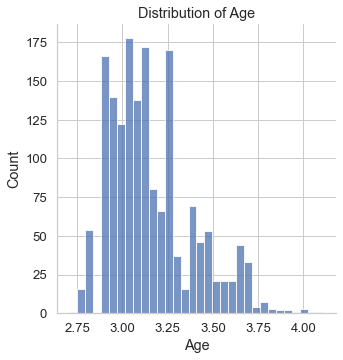

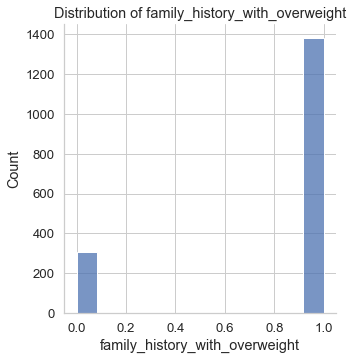

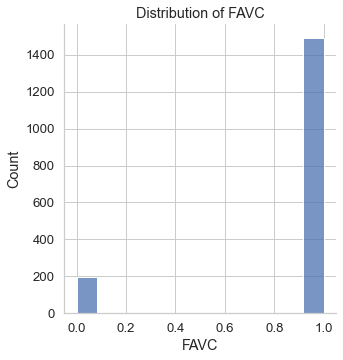

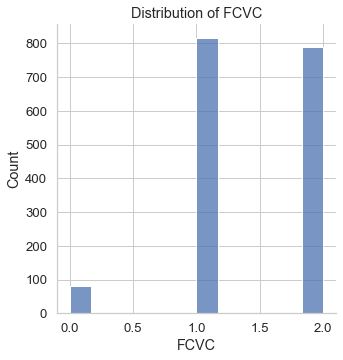

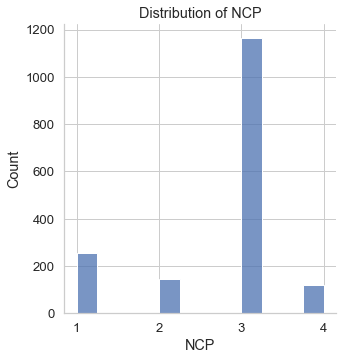

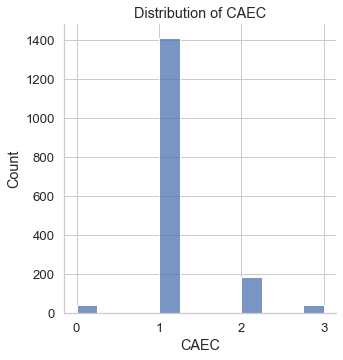

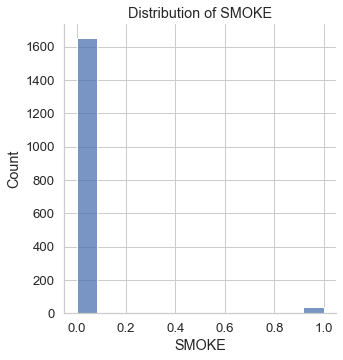

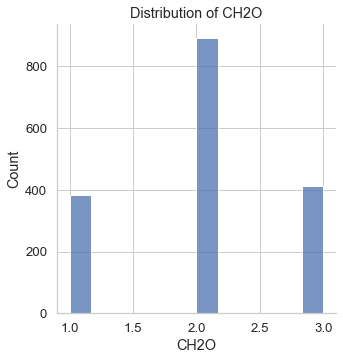

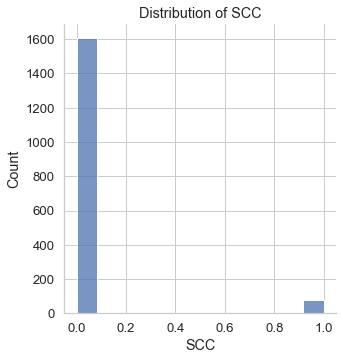

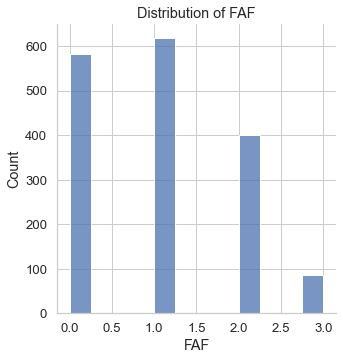

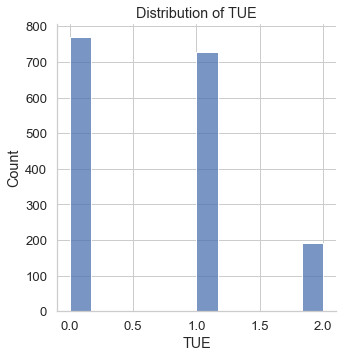

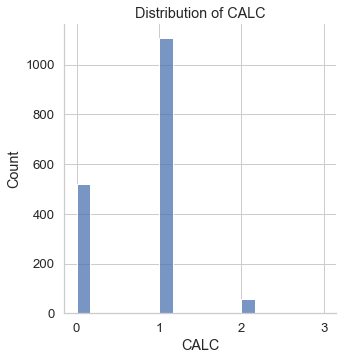

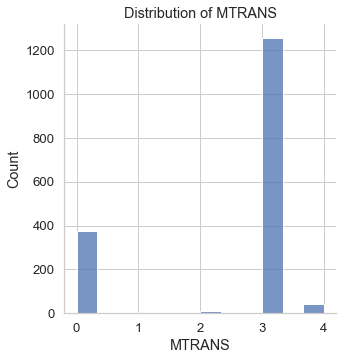

In [21]:
# quick inspect each column in X train to see distributions
sns.set(style='whitegrid', font_scale=1.2)
[display(sns.displot(X_train[x]), X_train[x].value_counts(), plt.title(f"Distribution of {x}")) for x in list(X_train.columns)]

### Check VIF

In [22]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
  
print(vif_data)

                           feature        VIF
0                           Gender   2.373448
1                              Age  38.073479
2   family_history_with_overweight   6.446876
3                             FAVC   9.606411
4                             FCVC   7.732581
5                              NCP  12.027061
6                             CAEC   7.313921
7                            SMOKE   1.051737
8                             CH2O  10.133575
9                              SCC   1.128639
10                             FAF   2.495818
11                             TUE   2.045901
12                            CALC   3.138217
13                          MTRANS   4.390265


VIF for Age is very high. Models were tested with and without Age. Age helped the models and boosted test accuracy across the board by about 7 basis points. 

# Baseline Model: Random Forest__StandardScaler__SMOTE

This was function was used to optimize the weights through a very long grid search

In [23]:
def gen_weights(num_cat):
    """
    Generate all possible combinations of weights for a given number of categories.

    Args:
    - num_cat (int): the number of categories to generate weights for.

    Returns:
    - A list of dictionaries, where each dictionary represents a unique combination of weights for each category.
      The keys of each dictionary are the category numbers (0 to num_cat - 1) and the values are the weights for each category.
    """
    master_weights = []
    weights = {}
    for cat in range(num_cat):
        weights.update({cat: .1})

    for i in range(num_cat):
        weight_values = list(np.arange(.4, 1.2, 0.2))
        weight_combinations = list(itertools.product(weight_values, repeat=num_cat))
        for combination in weight_combinations:
            temp_weights = weights.copy()
            for j in range(num_cat):
                temp_weights[j] = combination[j]
            master_weights.append(temp_weights.copy())
            
    return list(map(dict, set(frozenset(d.items()) for d in master_weights)))

weights = gen_weights(7)

len(weights)

16384

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': {0: 1.2000000000000002,
  1: 1.0,
  2: 1.0,
  3: 0.8,
  4: 1.2000000000000002,
  5: 0.6,
  6: 0.6},
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 11,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_samples': 0.6,
 'randomforestclassifier__min_impurity_decrease': 0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 456,
 'randomforestclassifier__oob_score': True,
 'randomforestclassifier__warm_start': True}

0.7956156831071233

Pipeline(steps=[('smote', SMOTE(k_neighbors=1, random_state=42)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 1.2000000000000002,
                                                      1: 1.0, 2: 1.0, 3: 0.8,
                                                      4: 1.2000000000000002,
                                                      5: 0.6, 6: 0.6},
                                        criterion='entropy', max_depth=11,
                                        max_features='sqrt', max_samples=0.6,
                                        min_impurity_decrease=0,
                                        n_estimators=456, oob_score=True,
                                        random_state=42, warm_start=True))])

array([0.09379391, 0.19810038, 0.08431835, 0.04367938, 0.07814037,
       0.07699818, 0.08260688, 0.00448546, 0.05568322, 0.01522204,
       0.07017576, 0.0590599 , 0.08200814, 0.05572803])

accuracy on test 0.7825059101654847
recall =  0.7809459651824184
f1_score =  0.7772203360117341


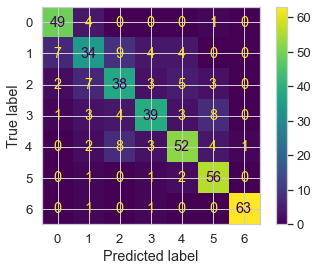

In [24]:
# Create pipeline with SMOTE, StandardScaler and RandomForestClassifier
pipeline = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore", sparse=False),
    SMOTE(random_state=42, k_neighbors=1),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

# Train the pipeline (transformations & predictor)
pipeline.fit(X_train, y_train)

# Predict using the pipeline (includes the transformers & trained predictor)
predicted = pipeline.predict(X_test)

# Define the grid of hyperparameters to search over
pipe_grid = {
    "randomforestclassifier__n_estimators": [456],
    "randomforestclassifier__criterion": ["entropy"],
    "randomforestclassifier__max_depth": [11],
    "randomforestclassifier__max_features": ["sqrt"],
    "randomforestclassifier__class_weight": [{0: 1.2000000000000002, 1: 1.0, 2: 1.0, 3: 0.8, 4: 1.2000000000000002, 5: 0.6, 6: 0.6}],
    "randomforestclassifier__min_impurity_decrease": [0],
    "randomforestclassifier__min_samples_split": [2],
    "randomforestclassifier__min_samples_leaf": [1],
    "randomforestclassifier__max_samples": [0.6],
    "randomforestclassifier__bootstrap": [True],
    "randomforestclassifier__oob_score": [True],
    "randomforestclassifier__warm_start": [True]
}

# Perform grid search to find the best combination of hyperparameters
second_pipe = GridSearchCV(
    estimator=pipeline,
    param_grid=pipe_grid,
    verbose=2,
    n_jobs=-1
)

second_pipe.fit(X_train, y_train)
display(second_pipe.best_params_)
display(second_pipe.best_score_)
display(second_pipe.best_estimator_)
best_model = second_pipe.best_estimator_
feat_imp = best_model["randomforestclassifier"].feature_importances_
feat_imp_series = pd.Series(feat_imp, 
    index = X_train.columns).sort_values(
    ascending = False)
display(feat_imp)
X_train.columns
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

print("accuracy on test", best_model.score(X_test, y_test))
print("recall = ", recall_score(y_test, y_pred, average="macro"))
print("f1_score = ", f1_score(y_test, y_pred, average="macro"))
plot_confusion_matrix(best_model,X_test,y_test)
plt.savefig('charts/Confusion_Matrix_base.png');

Further validating and comparing base model vs other options using a StackingRegressor

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


Pipeline(steps=[('smote', SMOTE(k_neighbors=1, random_state=42)),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1.2000000000000002,
                                                      1: 1.0, 2: 1.0, 3: 0.8,
                                                      4: 1.2000000000000002,
                                                      5: 0.6, 6: 0.6},
                                        criterion='entropy', max_depth=11,
                                        max_features='sqrt', max_samples=0.6,
                                        min_impurity_decrease=0,
                                        n_estimators=456, oob_score=True,
                                        random_state=42, warm_start=True))])

0.7956156831071233

array([0.09379391, 0.19810038, 0.08431835, 0.04367938, 0.07814037,
       0.07699818, 0.08260688, 0.00448546, 0.05568322, 0.01522204,
       0.07017576, 0.0590599 , 0.08200814, 0.05572803])

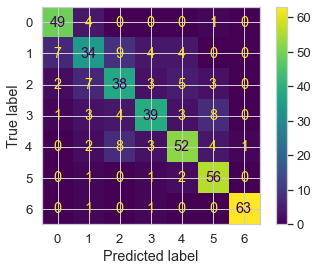

In [25]:
from imblearn.pipeline import Pipeline


# Create pipeline with SMOTE, StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=1)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Train the pipeline (transformations & predictor)
pipeline.fit(X_train, y_train)

# Predict using the pipeline (includes the transformers & trained predictor)
predicted = pipeline.predict(X_test)

# Define the grid of hyperparameters to search over
pipe_grid = {
    "rf__n_estimators": [456],
    "rf__criterion": ["entropy"],
    "rf__max_depth": [11],
    "rf__max_features": ["sqrt"],
    "rf__class_weight": [{0: 1.2000000000000002, 1: 1.0, 2: 1.0, 3: 0.8, 4: 1.2000000000000002, 5: 0.6, 6: 0.6}],
    "rf__min_impurity_decrease": [0],
    "rf__min_samples_split": [2],
    "rf__min_samples_leaf": [1],
    "rf__max_samples": [0.6],
    "rf__bootstrap": [True],
    "rf__oob_score": [True],
    "rf__warm_start": [True]
}

# Perform grid search to find the best combination of hyperparameters
second_pipe = GridSearchCV(
    estimator=pipeline,
    param_grid=pipe_grid,
    verbose=2,
    n_jobs=-1
)

second_pipe.fit(X_train, y_train)

# Fit the stacking regressor to the predicted X values and the true labels
estimators = [
    ('lr', LinearRegression()),
    ('knn', KNeighborsRegressor()),
    ('rt', DecisionTreeRegressor()),
]
sr = StackingRegressor(estimators)
final_p = Pipeline([('model', sr)])
final_p.fit(predicted.reshape(-1, 1), y_test)

# Get the best model from the grid search
best_model = second_pipe.best_estimator_
display(best_model)
display(second_pipe.best_score_)
# Get the feature importances of the best model
feat_imp = best_model.named_steps['rf'].feature_importances_
feat_imp_series = pd.Series(feat_imp, index=X_train.columns).sort_values(ascending=False)
display(feat_imp)
# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Plot the confusion matrix for the best model
plot_confusion_matrix(best_model, X_test, y_test);

# Final Model

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


{'xgbclassifier__colsample_bytree': 0.6,
 'xgbclassifier__gamma': 0,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 7,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__subsample': 0.8}

0.7950169437957614

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

array([0.1143202 , 0.0627237 , 0.12640324, 0.07093425, 0.07636473,
       0.06553428, 0.11182177, 0.04112323, 0.03709772, 0.06637838,
       0.04186976, 0.04007904, 0.07396457, 0.07138525], dtype=float32)

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

accuracy on test 0.8037825059101655
recall =  0.8027733168127257
f1_score =  0.7997581009802529


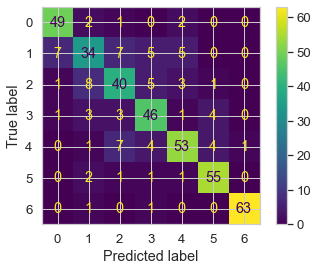

In [26]:
pipeline = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore", sparse=False),
    # SMOTE(random_state=42, k_neighbors=1),
    StandardScaler(),
    xgb.XGBClassifier())

# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipe_grid = {
    'xgbclassifier__learning_rate': [0.1],
    'xgbclassifier__n_estimators': [200],
    'xgbclassifier__max_depth': [7],
    'xgbclassifier__min_child_weight': [1],
    'xgbclassifier__gamma': [0],
    'xgbclassifier__subsample': [0.8],
    'xgbclassifier__colsample_bytree': [0.6]
}

second_pipe = GridSearchCV(
    estimator=pipeline,
    param_grid=pipe_grid,
    verbose=2,
    n_jobs=-1,
    cv=5
)

second_pipe.fit(X_train, y_train)
display(second_pipe.best_params_)
display(second_pipe.best_score_)
display(second_pipe.best_estimator_)
best_model = second_pipe.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

feat_imp = best_model["xgbclassifier"].feature_importances_
feat_imp_series = pd.Series(feat_imp, 
    index = X_train.columns).sort_values(
    ascending = False)
display(feat_imp)
display(X_train.columns)

print("accuracy on test", best_model.score(X_test, y_test))
print("recall = ", recall_score(y_test, y_pred, average="macro"))
print("f1_score = ", f1_score(y_test, y_pred, average="macro"))
plot_confusion_matrix(best_model,X_test,y_test)
plt.savefig('charts/Confusion_Matrix_final.png');

## Create probability distribution to inspect Gender by weight class in the data
Investigating why there is severe misclassification occuring on True Label 6 and Predicted Label 1

If you are male and in category 2 the probability of being overweight is: 0.01865118861962575
If you are male and in category 3 the probability of being overweight is: 0.024053601874965618
If you are male and in category 4 the probability of being overweight is: 0.03035863507896039
If you are male and in category 5 the probability of being overweight is: 0.03886144805965541
If you are male and in category 6 the probability of being overweight is: 0.0001437095151666764
If you are female and in category 2 the probability of being overweight is: 0.019098244914439406
If you are female and in category 3 the probability of being overweight is: 0.013566339490946612
If you are female and in category 4 the probability of being overweight is: 0.024869048716647902
If you are female and in category 5 the probability of being overweight is: 0.00026978257976639737
If you are female and in category 6 the probability of being overweight is: 0.04753078541702529


,Gender,Category,Probability
0,Male,2,0.018651
1,Male,3,0.024054
2,Male,4,0.030359
3,Male,5,0.038861
4,Male,6,0.000144
5,Female,2,0.019098
6,Female,3,0.013566
7,Female,4,0.024869
8,Female,5,0.000270
9,Female,6,0.047531


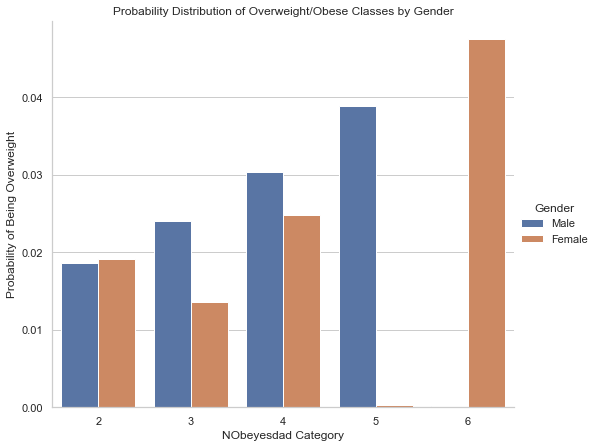

In [27]:
# Returns an iteration of probabilities for males and females for their weight class

# Count the number of males and females
num_male = (df['Gender'] == 1).sum()
num_female = (df['Gender'] == 0).sum()

# Initialize a list to store the results
probabilities_male = []
probabilities_female = []

# Calculate the probabilities for each category of NObeyesdad equal to 2
for i in range(2, 7):
    # Count the number of overweight males and females
    num_overweight_male = ((df['Gender'] == 1) & (df['NObeyesdad'] == i)).sum()
    num_overweight_female = ((df['Gender'] == 0) & (df['NObeyesdad'] == i)).sum()

    # Calculate the overall probabilities
    p_male = num_male / len(df)
    p_female = num_female / len(df)
    p_overweight = (num_overweight_male + num_overweight_female) / len(df)

    # Calculate the conditional probability for males
    p_overweight_given_male = (num_overweight_male / len(df)) * p_overweight / p_male
    probabilities_male.append(p_overweight_given_male)

    # Calculate the conditional probability for females
    p_overweight_given_female = (num_overweight_female / len(df)) * p_overweight / p_female
    probabilities_female.append(p_overweight_given_female)

# Print the results for males
for i, prob in enumerate(probabilities_male):
    category = i + 2
    print("If you are male and in category", category, "the probability of being overweight is:", prob)

# Print the results for females
for i, prob in enumerate(probabilities_female):
    category = i + 2
    print("If you are female and in category", category, "the probability of being overweight is:", prob)


# Create a data frame with the probabilities for males and females
data = pd.DataFrame({
    'Gender': ['Male']*5 + ['Female']*5,
    'Category': [2, 3, 4, 5, 6]*2,
    'Probability': probabilities_male + probabilities_female
})

# Set the style of the chart
sns.set(style="whitegrid")

# Create a bar plot with the probabilities
sns.catplot(x="Category", y="Probability", hue="Gender", data=data, kind="bar", height=6, aspect=1.2)
plt.xlabel("NObeyesdad Category")
plt.ylabel("Probability of Being Overweight")
plt.title("Probability Distribution of Overweight/Obese Classes by Gender")
plt.savefig('charts/Probability_Distribution_of_Overweight_Obese_Classes_by_Gender.png');
data

Now we see that there are no male samples in the Obesity class 6; reason for misclassification

# Conclusion
## This final XGBoost model has:

#### Cross Validation score = 79.50%

#### Test Accuracy = 80.38%

This model is preferred over the base model, so we can accept the alternative hypothesis (XGBoost Model) in favor of the null hypothesis (RandomForest Model).

## The base RandomForest model has:

#### Cross Validation score = 79.56%

#### Test Accuracy = 78.25%

## Implications
This model can be deployed immediately to assign weights to lifestyle metrics Accenture has in its database for it target customers. Higher weights can be given to the tendency to snack, family history with obesity, and Gender. Alternatively the model can be used to predict if someone is obese if they have provided answers to the survey questions originally asked of participants in this dataset. Even if the answers are implied (answers are inferred from other data), this model can provide a decent predictive accuracy for how obese that person is. Furthermore, if the objective is to simply classify if someone is obese, overweight, normal, or underweight, this algorithm would be fine tuned to predict for those broader classes. 